## CV03 - 잘 만든 Augmentation

데이터를 구축하는데에 많은 비용과 시간이 필요하다.   
제한된 데이터셋을 최대한 활용하기 위해 augmentation이란 방법을 사용할 수 있다.   

### Data Augmentation

갖고 있는 데이터셋을 여러 가지 방법으로 증가시켜 실질적인 학습 데이터셋의 규모를 키우는 방법    

일반적인 방법은 저장된 이미지 데이터를 메모리에 로드한 후 학습시킬 때 변형을 가하는 방법이다.   

method
1. 수직축을 중심으로 좌우 반전   
2. 무작위로 크롭
3. 회전, 비틀기 등 있지만 실제로 많이 사용하지 않음(복잡하기 때문에)   
4. 색변환(RGB값을 조정, 특정 확률분포내에서)   
5. PCA 색 확대: 주된 색이 R,B라면 여기에 큰 수를 더하거나 빼고 G엔 적게 조정하여 전체적인 색조 유지   

텐서플로우 튜토리얼 - image augmentation   
https://www.tensorflow.org/tutorials/images/data_augmentation   

Flipping: 이미지를 대칭하는 기능   
Gray scale: 3채널을 1채널으로 변환, 채널마다 가중치를 주어 가중치합이 1이 되게 한다.   
Saturation: RGB->HSV(Hue(색조), Saturation(채도), Value(명도)), S채널에 오프셋 적용하여 선명도 향상   
색상 모델(Gray, RGB, HSV, YCbCr)에 대한 참조사이트   
https://darkpgmr.tistory.com/66   
Brightness: 밝기 조절
Rotation: 이미지 각도 조절
Center Crop: 이미지의 중앙을 기준으로 확대하는 기능   

https://github.com/aleju/imgaug

In [1]:
# Flip 예제

import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt
import os

sample_img_path = os.getenv('HOME')+'/aiffel/data_augmentation/images/mycat.jpg'
sample_img_path

'/home/aiffel0042/aiffel/data_augmentation/images/mycat.jpg'

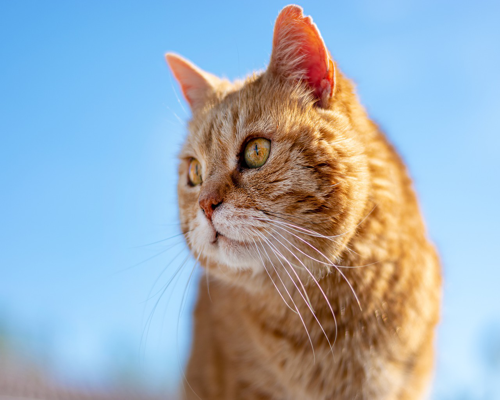

In [13]:
# 이미지 리사이징

image = Image.open(sample_img_path).resize((500, 400)) # 이미지에 따라 숫자를 바꾸어 보세요.
image_tensor = tf.keras.preprocessing.image.img_to_array(image)
image

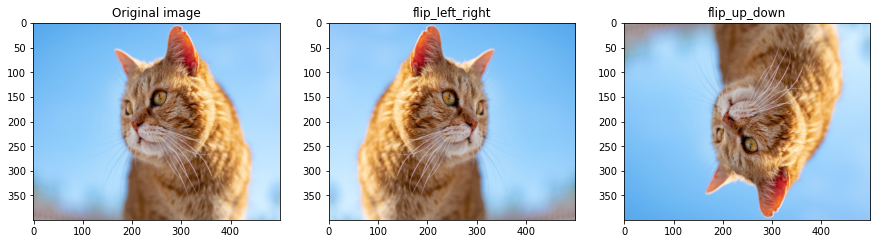

In [14]:
flip_lr_tensor = tf.image.flip_left_right(image_tensor)
flip_ud_tensor = tf.image.flip_up_down(image_tensor)
flip_lr_image = tf.keras.preprocessing.image.array_to_img(flip_lr_tensor)
flip_ud_image = tf.keras.preprocessing.image.array_to_img(flip_ud_tensor)

plt.figure(figsize=(15, 15))

plt.subplot(1,3,1)
plt.title('Original image')
plt.imshow(image)

plt.subplot(1,3,2)
plt.title('flip_left_right')
plt.imshow(flip_lr_image)

plt.subplot(1,3,3)
plt.title('flip_up_down')
plt.imshow(flip_ud_image)

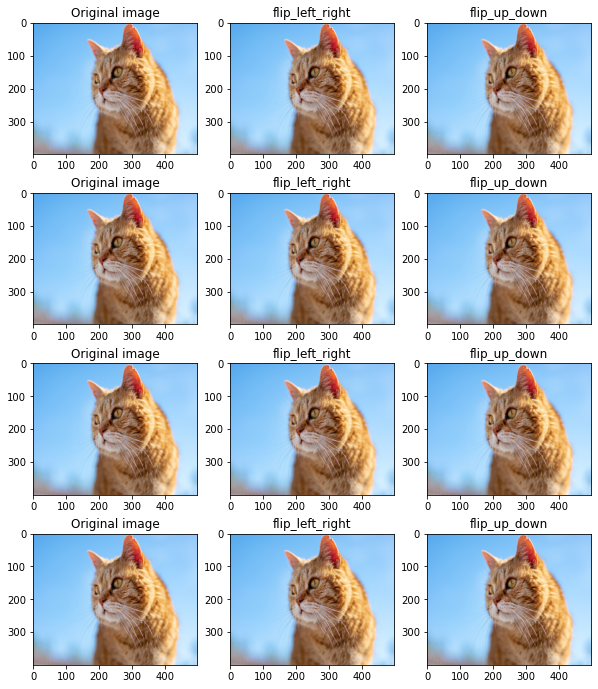

In [23]:
# random flip

plt.figure(figsize=(10, 12))

row = 4
for i in range(row):
    flip_lr_tensor = tf.image.random_flip_left_right(image_tensor)
    flip_ud_tensor = tf.image.random_flip_up_down(image_tensor)
    flip_lr_image = tf.keras.preprocessing.image.array_to_img(flip_lr_tensor)
    flip_ud_image = tf.keras.preprocessing.image.array_to_img(flip_ud_tensor)
    
    plt.subplot(4,3,i*3+1)
    plt.title('Original image')
    plt.imshow(image)

    plt.subplot(4,3,i*3+2)
    plt.title('flip_left_right')
    plt.imshow(flip_lr_image)

    plt.subplot(4,3,i*3+3)
    plt.title('flip_up_down')
    plt.imshow(flip_ud_image)

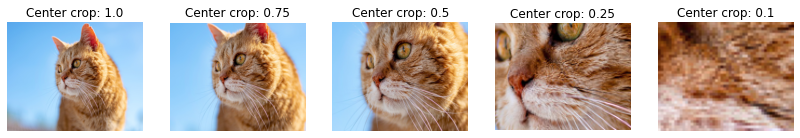

In [26]:
# Center Crop

plt.figure(figsize=(17, 15))

central_fractions = [1.0, 0.75, 0.5, 0.25, 0.1]  # 얼마나 확대할 지 조절하는 변수
col = len(central_fractions)
for i, frac in enumerate(central_fractions):
    cropped_tensor = tf.image.central_crop(image_tensor, frac)
    cropped_img = tf.keras.preprocessing.image.array_to_img(cropped_tensor)
    
    plt.subplot(1,col+1,i+1)
    plt.title(f'Center crop: {frac}')
    plt.imshow(cropped_img)
    plt.axis('off')

In [27]:
def random_central_crop(image_tensor, range=(0, 1)):
    central_fraction = tf.random.uniform([1], minval=range[0], maxval=range[1], dtype=tf.float32)
    cropped_tensor = tf.image.central_crop(image_tensor, central_fraction)
    return cropped_tensor

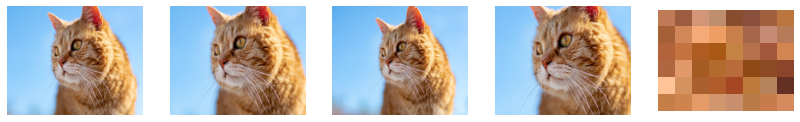

In [32]:
plt.figure(figsize=(17, 15))

col = 5
for i, frac in enumerate(central_fractions):
    cropped_tensor =random_central_crop(image_tensor)
    cropped_img = tf.keras.preprocessing.image.array_to_img(cropped_tensor)
    
    plt.subplot(1,col+1,i+1)
    plt.imshow(cropped_img)
    plt.axis('off')

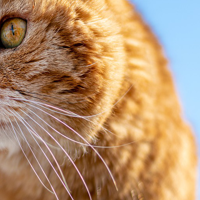

In [81]:
# tf.image.random_crop(): 지정한 크기만큼 랜덤으로 크롭하는 함수
# https://www.tensorflow.org/api_docs/python/tf/image/random_crop

rn_cropped_tensor = tf.image.random_crop(image_tensor, [200, 200, 3])
rn_cropped_image = tf.keras.preprocessing.image.array_to_img(rn_cropped_tensor)
rn_cropped_image

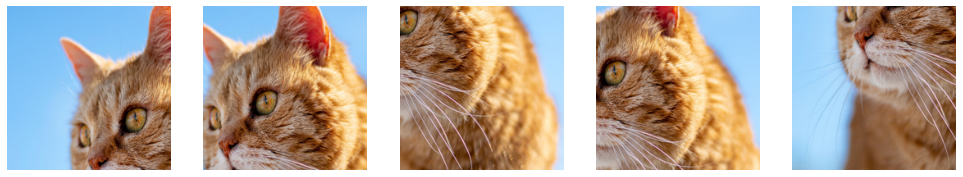

In [87]:
plt.figure(figsize=(17, 15))


for i in range(5):
    rn_cropped_tensor = tf.image.random_crop(image_tensor, [200, 200, 3])
    rn_cropped_image = tf.keras.preprocessing.image.array_to_img(rn_cropped_tensor)
    
    plt.subplot(1, 5, i + 1)
    plt.imshow(rn_cropped_image)
    plt.axis('off')

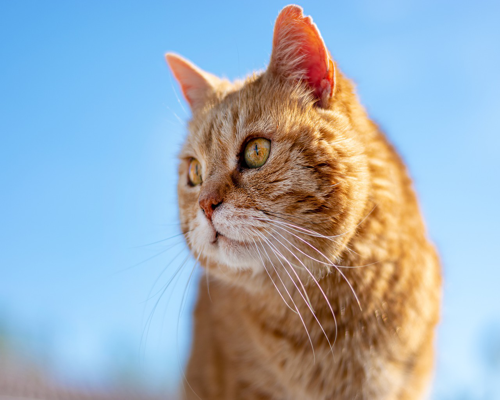

In [149]:
# tf.image.random_brightness(): 랜덤으로 delta을 조정하는 함수
# https://www.tensorflow.org/api_docs/python/tf/image/random_brightness

rn_brightness_tensor = tf.image.random_brightness(image_tensor, 255)
rn_brightness_image = tf.keras.preprocessing.image.array_to_img(rn_brightness_tensor)

rn_brightness_image

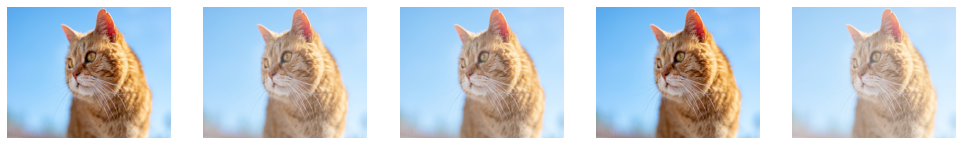

In [154]:
plt.figure(figsize=(17, 15))


for i in range(5):
    rn_brightness_tensor = tf.image.random_brightness(image_tensor, 255)
    rn_brightness_image = tf.keras.preprocessing.image.array_to_img(rn_brightness_tensor)
    
    plt.subplot(1, 5, i + 1)
    plt.imshow(rn_brightness_image)
    plt.axis('off')

### imgaug 라이브러리 사용하기

In [156]:
# https://github.com/aleju/imgaug
# https://imgaug.readthedocs.io/en/latest/source/overview_of_augmenters.html
# imgaug는 배열을 기본 형태로 사용함으로 numpy 라이브러리가 필요하다

import numpy as np
import imgaug.augmenters as iaa

image_arr = np.array(image)

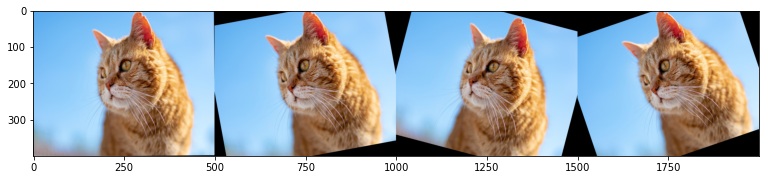

In [157]:
# Affine(): 아핀 변환(Affine transform), 2D변환의 일종으로 이미지의 스케일 조절, 평행이동, 회전 등의 변환
# 2D변환 : https://darkpgmr.tistory.com/79

images = [image_arr, image_arr, image_arr, image_arr]
rotate = iaa.Affine(rotate=(-25, 25))  # (-25, 25) 범위에서 회전
images_aug = rotate(images=images)
plt.figure(figsize=(13,13))
plt.imshow(np.hstack(images_aug))
plt.show()

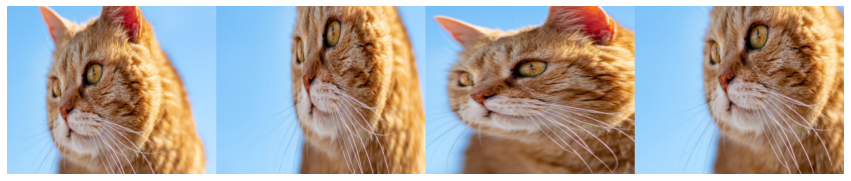

In [170]:
# iaa.Crop() == tensor의 crop()

images = [image_arr, image_arr, image_arr, image_arr]
crop = iaa.Crop(percent=(0.32, 0.05))  # 원본 비율
images_aug = crop(images=images)
plt.figure(figsize=(15,13))
plt.imshow(np.hstack(images_aug))
plt.axis('off')
plt.show()

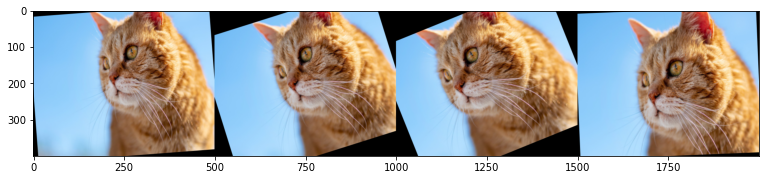

In [178]:
# iaa.Sequetial(): 여러 augmentation을 한꺼번에 적용하는 함수
# rotation과 crop이 적용된 결과

images = [image_arr, image_arr, image_arr, image_arr]
rotate_crop = iaa.Sequential([
    iaa.Affine(rotate=(-25, 25)),
    iaa.Crop(percent=(0, 0.2))
], random_order=True)
images_aug = rotate_crop(images=images)
plt.figure(figsize=(13,13))
plt.imshow(np.hstack(images_aug))
plt.show()

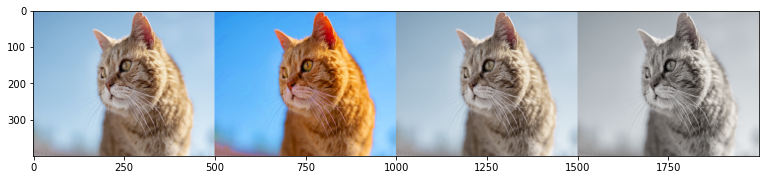

In [184]:
# iaa.Oneof(): 여러 augmentation 중에 하나를 선택하도록 하는 함수

images = [image_arr, image_arr, image_arr, image_arr]
seq = iaa.OneOf([
     iaa.Grayscale(alpha=(0.0, 1.0)),
     iaa.AddToSaturation((-50, 50))
])
images_aug = seq(images=images)
plt.figure(figsize=(13,13))
plt.imshow(np.hstack(images_aug))
plt.show()

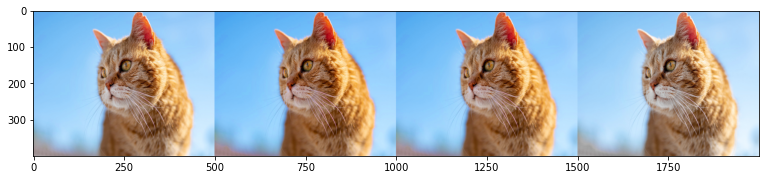

In [229]:
# iaa.Sometimes(): augmentation들이 일정 확률로 선택이 되도록 하는 함수

images = [image_arr] * 4
seq = iaa.Sometimes(
    0.5,
    iaa.AddToSaturation((-50, 50)),
    iaa.Sometimes(
        0.2,
        iaa.Grayscale(alpha=(0.0, 1.0))
    )
    
)
images_aug = seq(images=images)
plt.figure(figsize=(13,13))
plt.imshow(np.hstack(images_aug))
plt.show()

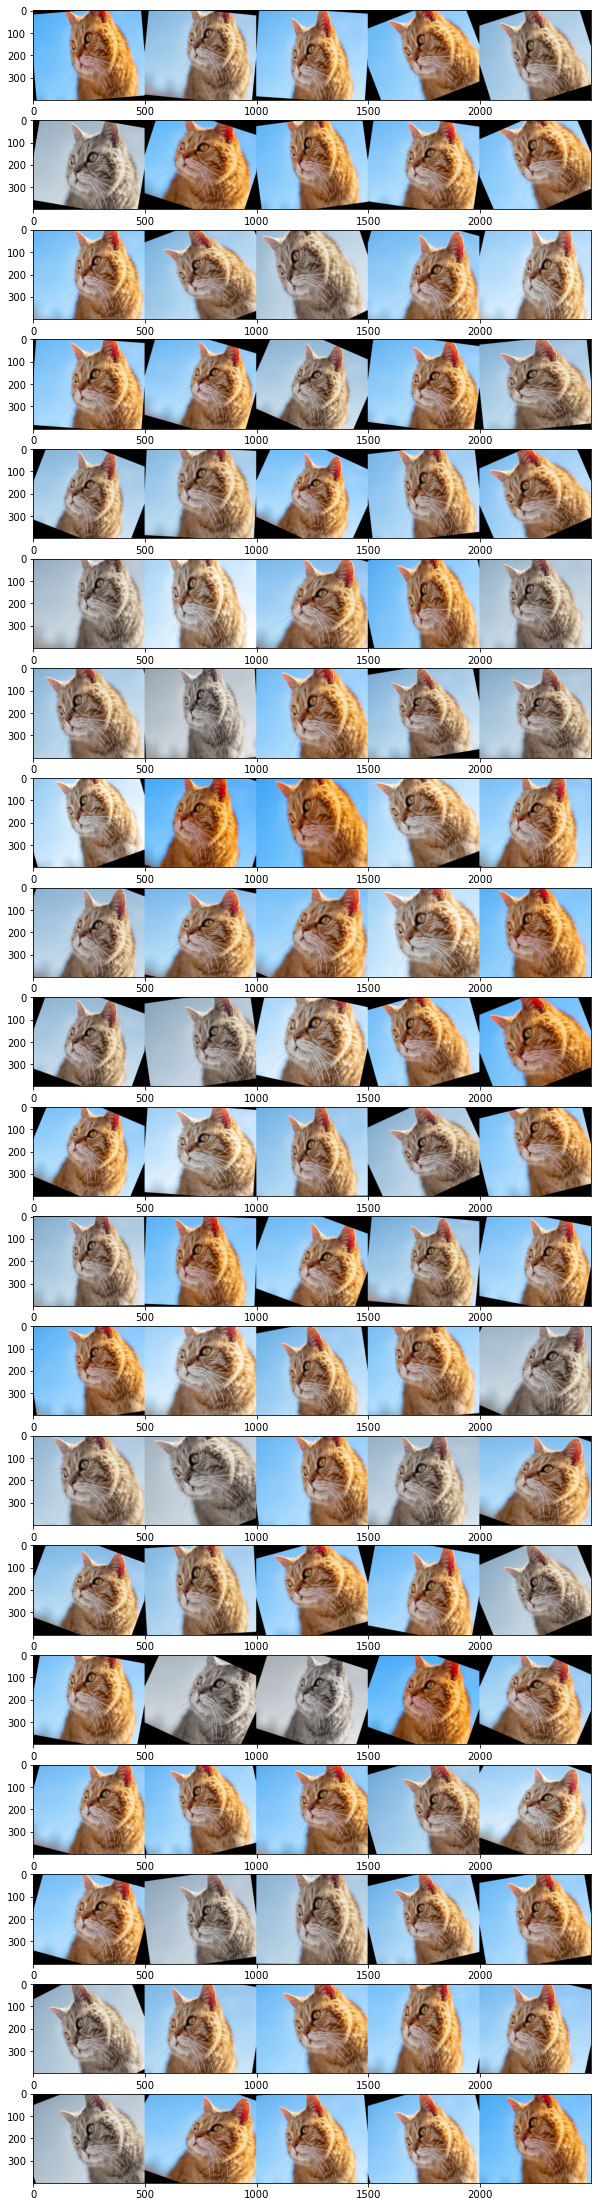

In [253]:
seq = iaa.Sequential([
    iaa.OneOf([
         iaa.Grayscale(alpha=(0.0, 1.0)),
         iaa.Sometimes(
             0.5,
             iaa.AddToSaturation((-50, 50))
         )
    ]),
    iaa.Sequential([
        iaa.Crop(percent=(0, 0.2)),
        iaa.Affine(rotate=(-25, 25)),
    ], random_order=True)
])

plt.figure(figsize=(10, 40))
for i in range(20):
    images = [image_arr, image_arr, image_arr, image_arr, image_arr]
    images_aug = seq(images=images)
    plt.subplot(20,1,i+1)
    plt.imshow(np.hstack(images_aug))

plt.show()